# Test cobalt package for unbalanced dgp

In [1]:
library(ggplot2)
library(gridExtra)

library(cobalt)

Warning message:
"package 'ggplot2' was built under R version 4.4.2"
Warning message:
"package 'gridExtra' was built under R version 4.4.2"
Warning message:
"package 'cobalt' was built under R version 4.4.2"
 cobalt (Version 4.5.5, Build Date: 2024-04-02)



## Data

In [2]:
# load data from csv
dgp_name <- "unbalanced"

df_train <- read.csv(paste0("../dgps/data/", dgp_name, "_train.csv"))
df_test <- read.csv(paste0("../dgps/data/", dgp_name, "_test.csv"))

print(paste0("percentage of treated in train set: ", mean(df_train$D)))
print(paste0("percentage of treated in test set: ", mean(df_test$D)))

head(df_train)

[1] "percentage of treated in train set: 0.0534"
[1] "percentage of treated in test set: 0.06"


,X1,X2,X3,D,Y,m_oracle,m_hat,m_calibrated,m_oracle_ate_weights,m_oracle_att_weights,m_hat_ate_weights,m_hat_att_weights,m_calibrated_ate_weights,m_calibrated_att_weights
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.3722713,0.5955493,0,0,3.72863869,0.1357547484,0.1399170569,0.142857143,1.157079,0.1570789636,1.162679,0.1626785626,1.166667,1.666667e-01
2,0.4621035,0.7556818,0,0,1.33865480,0.0212176726,0.0238146229,0.023364486,1.021678,0.0216776213,1.024396,0.0243955948,1.023923,2.392344e-02
3,-0.9600463,0.2400384,1,0,2.42771474,0.0034699780,0.0034202943,0.001828154,1.003482,0.0034820607,1.003432,0.0034320329,1.001832,1.831502e-03
4,-0.6075688,0.9346054,1,0,2.38793719,0.0035060851,0.0044132260,0.001828154,1.003518,0.0035184210,1.004433,0.0044327889,1.001832,1.831502e-03
5,-0.5653930,0.3952885,0,0,1.46563010,0.0039657984,0.0040187528,0.001828154,1.003982,0.0039815886,1.004035,0.0040349684,1.001832,1.831502e-03
6,-2.1056469,0.1040103,0,0,-0.03463553,0.0002446826,0.0002321902,0.000000000,1.000245,0.0002447424,1.000232,0.0002322441,1.000000,1.000000e-12


## ATE

### Balance Tables

In [3]:
formula <- as.formula("D ~ X1 + X2 + X3")
sd_denom = "weighted"

In [4]:
bal_table_train <- bal.tab(
    x=formula,
    treat="D",
    data=df_train,
    weights="m_oracle_ate_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_test <- bal.tab(
    x=formula,
    treat="D",
    data=df_test,
    weights="m_oracle_ate_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_train
bal_table_test

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5866   0.3500
X2 Contin. -0.1411  -0.1453
X3  Binary  0.0898  -0.0043
Y  Contin.  2.1288   1.2294

Effective sample sizes
           Control Treated
Unadjusted 4733.    267.  
Adjusted   3647.56   41.19

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5896  -0.0547
X2 Contin. -0.2337  -0.1091
X3  Binary  0.0991   0.0060
Y  Contin.  2.3553   1.0839

Effective sample sizes
           Control Treated
Unadjusted 4700.    300.  
Adjusted   4583.74   23.85

### Love Plots

In [5]:

ate_plots_train <- list()
ate_plots_test <- list()

for (i in seq_along(c("m_oracle_ate_weights", "m_hat_ate_weights", "m_calibrated_ate_weights"))) {

    weights <- c("m_oracle_ate_weights", "m_hat_ate_weights", "m_calibrated_ate_weights")[i]

    bal_table_train <- bal.tab(
        x=formula,
        treat="D",
        data=df_train,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    bal_table_test <- bal.tab(
        x=formula,
        treat="D",
        data=df_test,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    print(bal_table_train)
    print(bal_table_test)

    p_train <- love.plot(bal_table_train, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Train - ", weights))
    
    p_test <- love.plot(bal_table_test, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Test - ", weights))

    ate_plots_train[[i]] <- p_train
    ate_plots_test[[i]] <- p_test
}

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5866   0.3500
X2 Contin. -0.1411  -0.1453
X3  Binary  0.0898  -0.0043
Y  Contin.  2.1288   1.2294

Effective sample sizes
           Control Treated
Unadjusted 4733.    267.  
Adjusted   3647.56   41.19
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5896  -0.0547
X2 Contin. -0.2337  -0.1091
X3  Binary  0.0991   0.0060
Y  Contin.  2.3553   1.0839

Effective sample sizes
           Control Treated
Unadjusted 4700.    300.  
Adjusted   4583.74   23.85
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5914   0.3498
X2 Contin. -0.1411  -0.2455
X3  Binary  0.0898  -0.0115
Y  Contin.  2.1198   1.2472

Effective sample sizes
           Control Treated
Unadjusted 4733.     267. 
Adjusted   3890.72    40.6
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5794  -0.0451
X2 Contin. -0.2346  -0.2193
X3  Binary  0.0991  -0.0012
Y  Contin.  2.3291   1.1062

Effective sample sizes
           Control Treated
Unadju

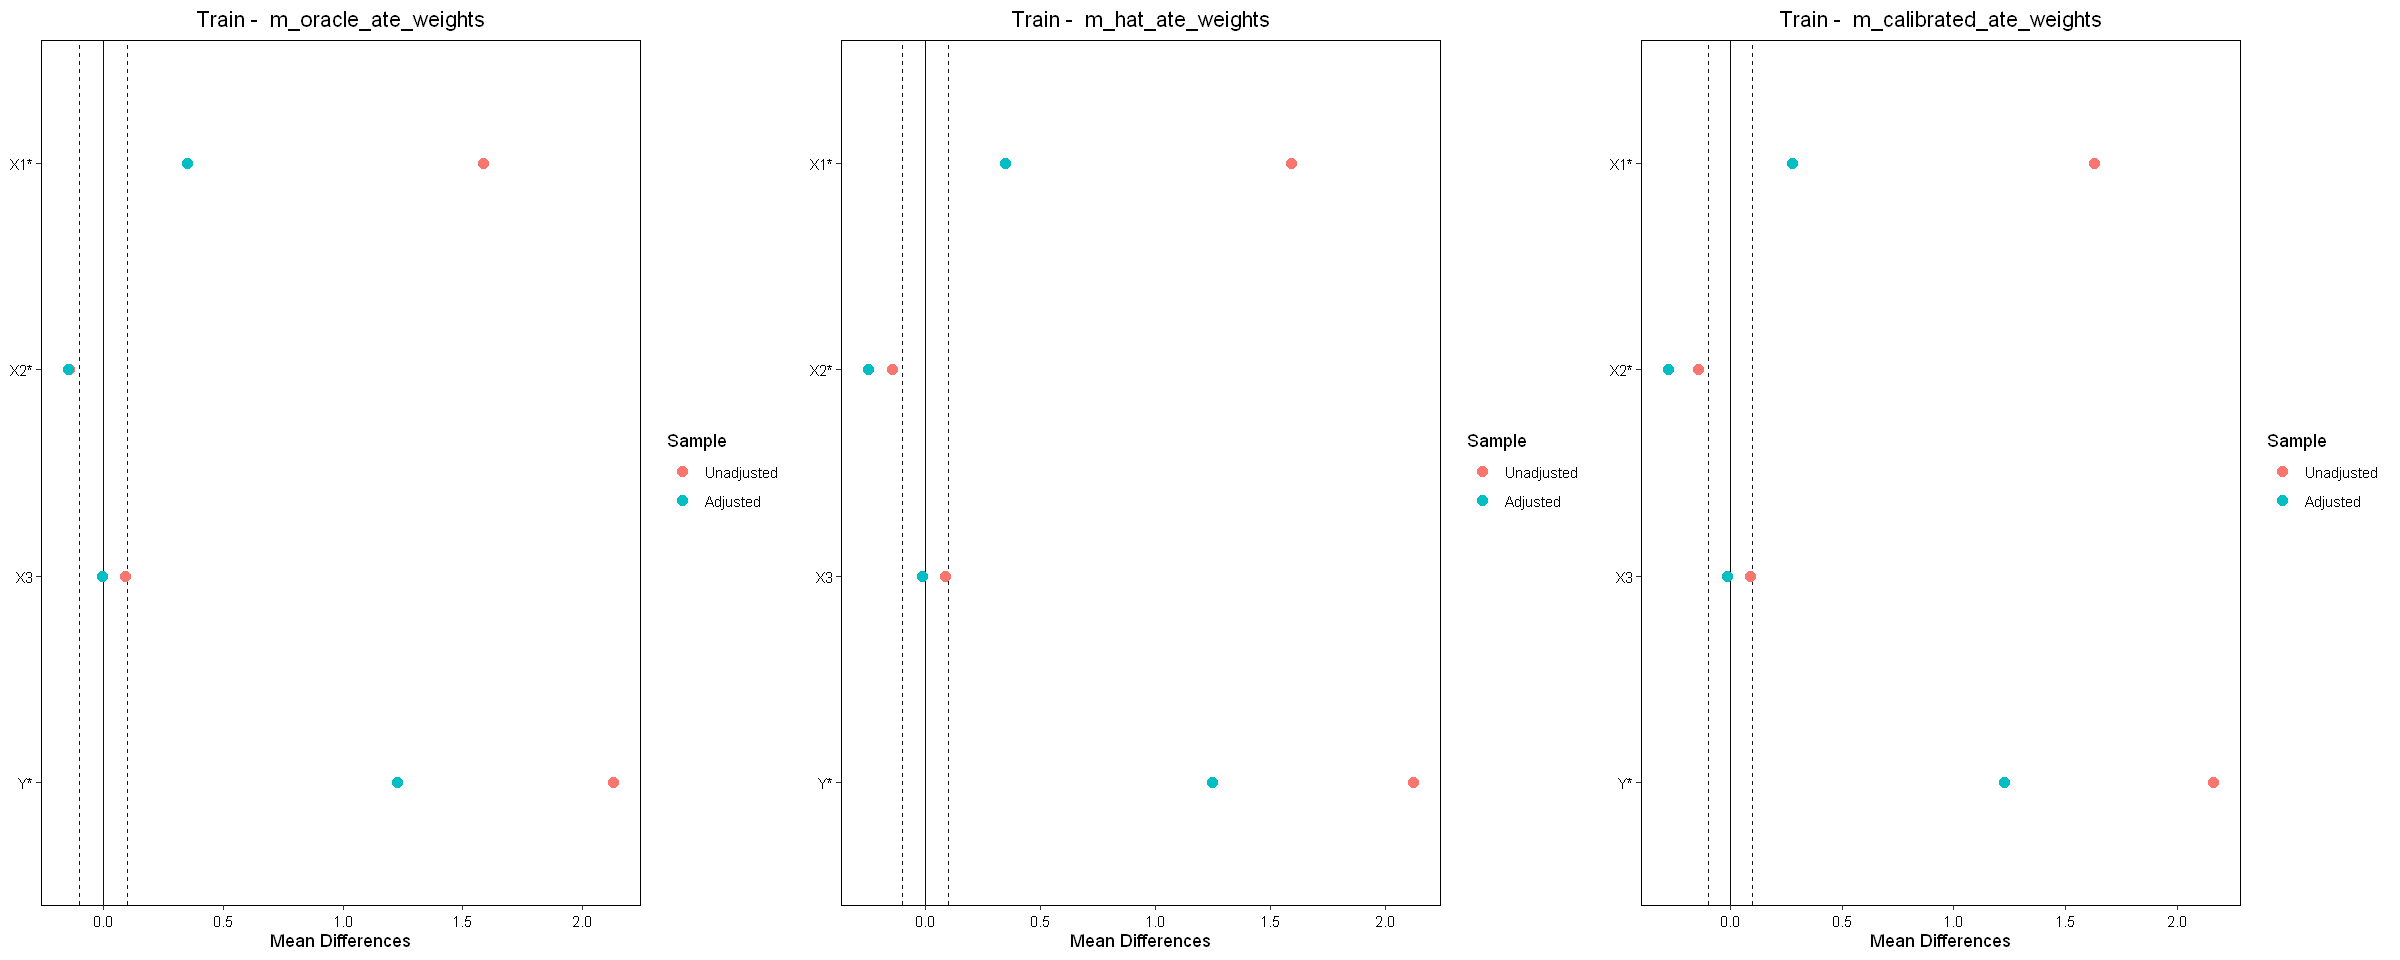

In [6]:
options(repr.plot.width = 20, repr.plot.height = 8)
grid.arrange(grobs = ate_plots_train, nrow = 1, ncol = 3)

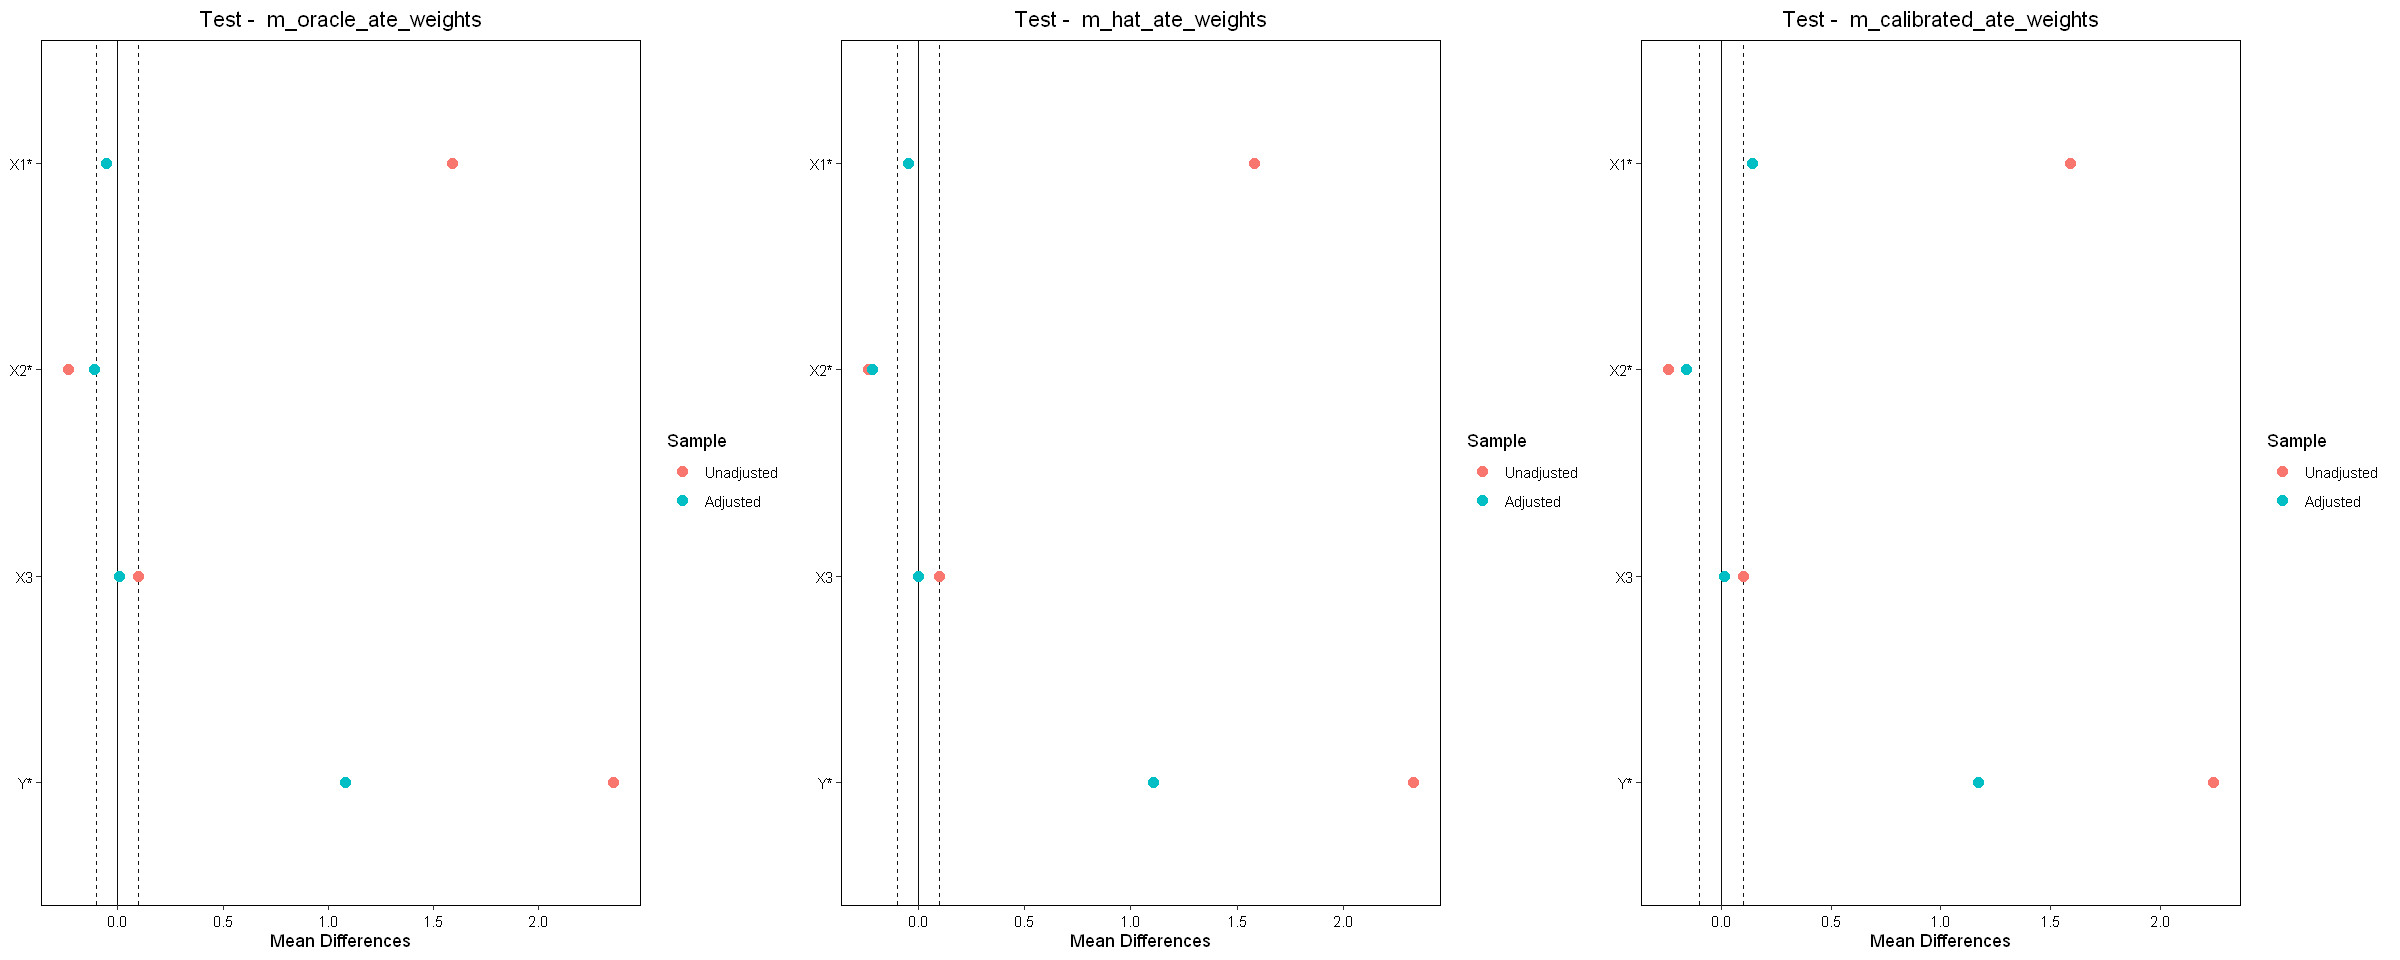

In [7]:
options(repr.plot.width = 20, repr.plot.height = 8)
grid.arrange(grobs = ate_plots_test, nrow = 1, ncol = 3)

## ATT

### Balance Tables

In [8]:
formula <- as.formula("D ~ X1 + X2 + X3")
sd_denom = "weighted"

In [9]:
bal_table_train <- bal.tab(
    x=formula,
    treat="D",
    data=df_train,
    weights="m_oracle_att_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_test <- bal.tab(
    x=formula,
    treat="D",
    data=df_test,
    weights="m_oracle_att_weights",
    addl =  ~Y,
    un = TRUE,
    s.d.denom = sd_denom
)

bal_table_train
bal_table_test

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5636  -0.2837
X2 Contin. -0.1433   0.1996
X3  Binary  0.0898   0.0669
Y  Contin.  2.4009   0.7766

Effective sample sizes
           Control Treated
Unadjusted 4733.       267
Adjusted     56.53     267

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.9263   0.0521
X2 Contin. -0.2524  -0.0338
X3  Binary  0.0991   0.0117
Y  Contin.  2.5689   1.1782

Effective sample sizes
           Control Treated
Unadjusted 4700.       300
Adjusted    455.49     300

### Love Plots

In [10]:
att_plots_train <- list()
att_plots_test <- list()

for (i in seq_along(c("m_oracle_att_weights", "m_hat_att_weights", "m_calibrated_att_weights"))) {

    weights <- c("m_oracle_att_weights", "m_hat_att_weights", "m_calibrated_att_weights")[i]

    bal_table_train <- bal.tab(
        x=formula,
        treat="D",
        data=df_train,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    bal_table_test <- bal.tab(
        x=formula,
        treat="D",
        data=df_test,
        weights=weights,
        addl =  ~Y,
        un = TRUE,
        s.d.denom = sd_denom
    )

    print(bal_table_train)
    print(bal_table_test)

    p_train <- love.plot(bal_table_train, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Train - ", weights))
    
    p_test <- love.plot(bal_table_test, thresholds = 0.1, stars = "std") +
        ggtitle(paste("Test - ", weights))

    att_plots_train[[i]] <- p_train
    att_plots_test[[i]] <- p_test
}

Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.5636  -0.2837
X2 Contin. -0.1433   0.1996
X3  Binary  0.0898   0.0669
Y  Contin.  2.4009   0.7766

Effective sample sizes
           Control Treated
Unadjusted 4733.       267
Adjusted     56.53     267
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.9263   0.0521
X2 Contin. -0.2524  -0.0338
X3  Binary  0.0991   0.0117
Y  Contin.  2.5689   1.1782

Effective sample sizes
           Control Treated
Unadjusted 4700.       300
Adjusted    455.49     300
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.6014  -0.2340
X2 Contin. -0.1423   0.0890
X3  Binary  0.0898   0.0553
Y  Contin.  2.3876   0.8464

Effective sample sizes
           Control Treated
Unadjusted 4733.       267
Adjusted     73.31     267
Balance Measures
      Type Diff.Un Diff.Adj
X1 Contin.  1.9162   0.0588
X2 Contin. -0.2512  -0.1322
X3  Binary  0.0991   0.0102
Y  Contin.  2.5361   1.1960

Effective sample sizes
           Control Treated
Unadju

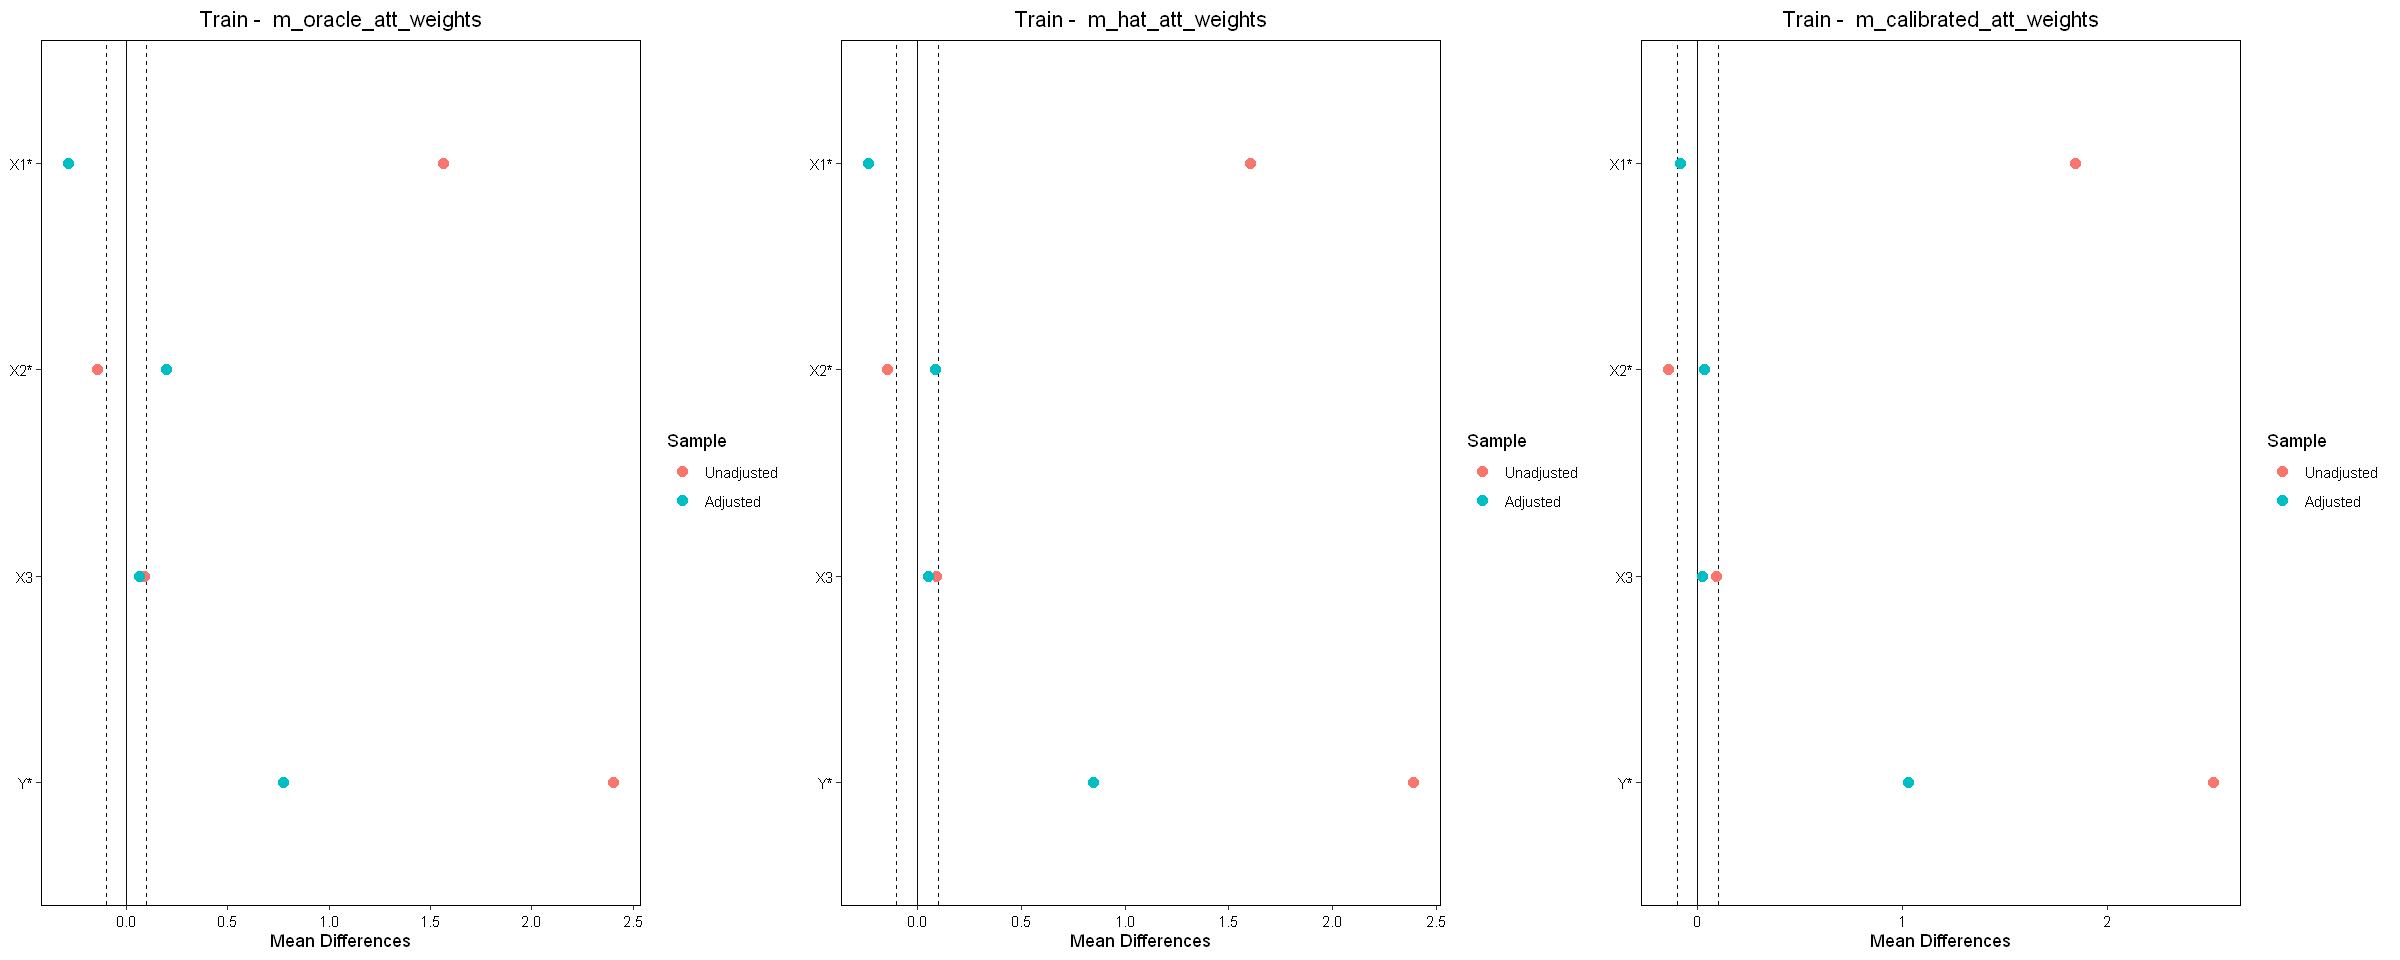

In [11]:
options(repr.plot.width = 20, repr.plot.height = 8)
grid.arrange(grobs = att_plots_train, nrow = 1, ncol = 3)

## Additional Balance plots

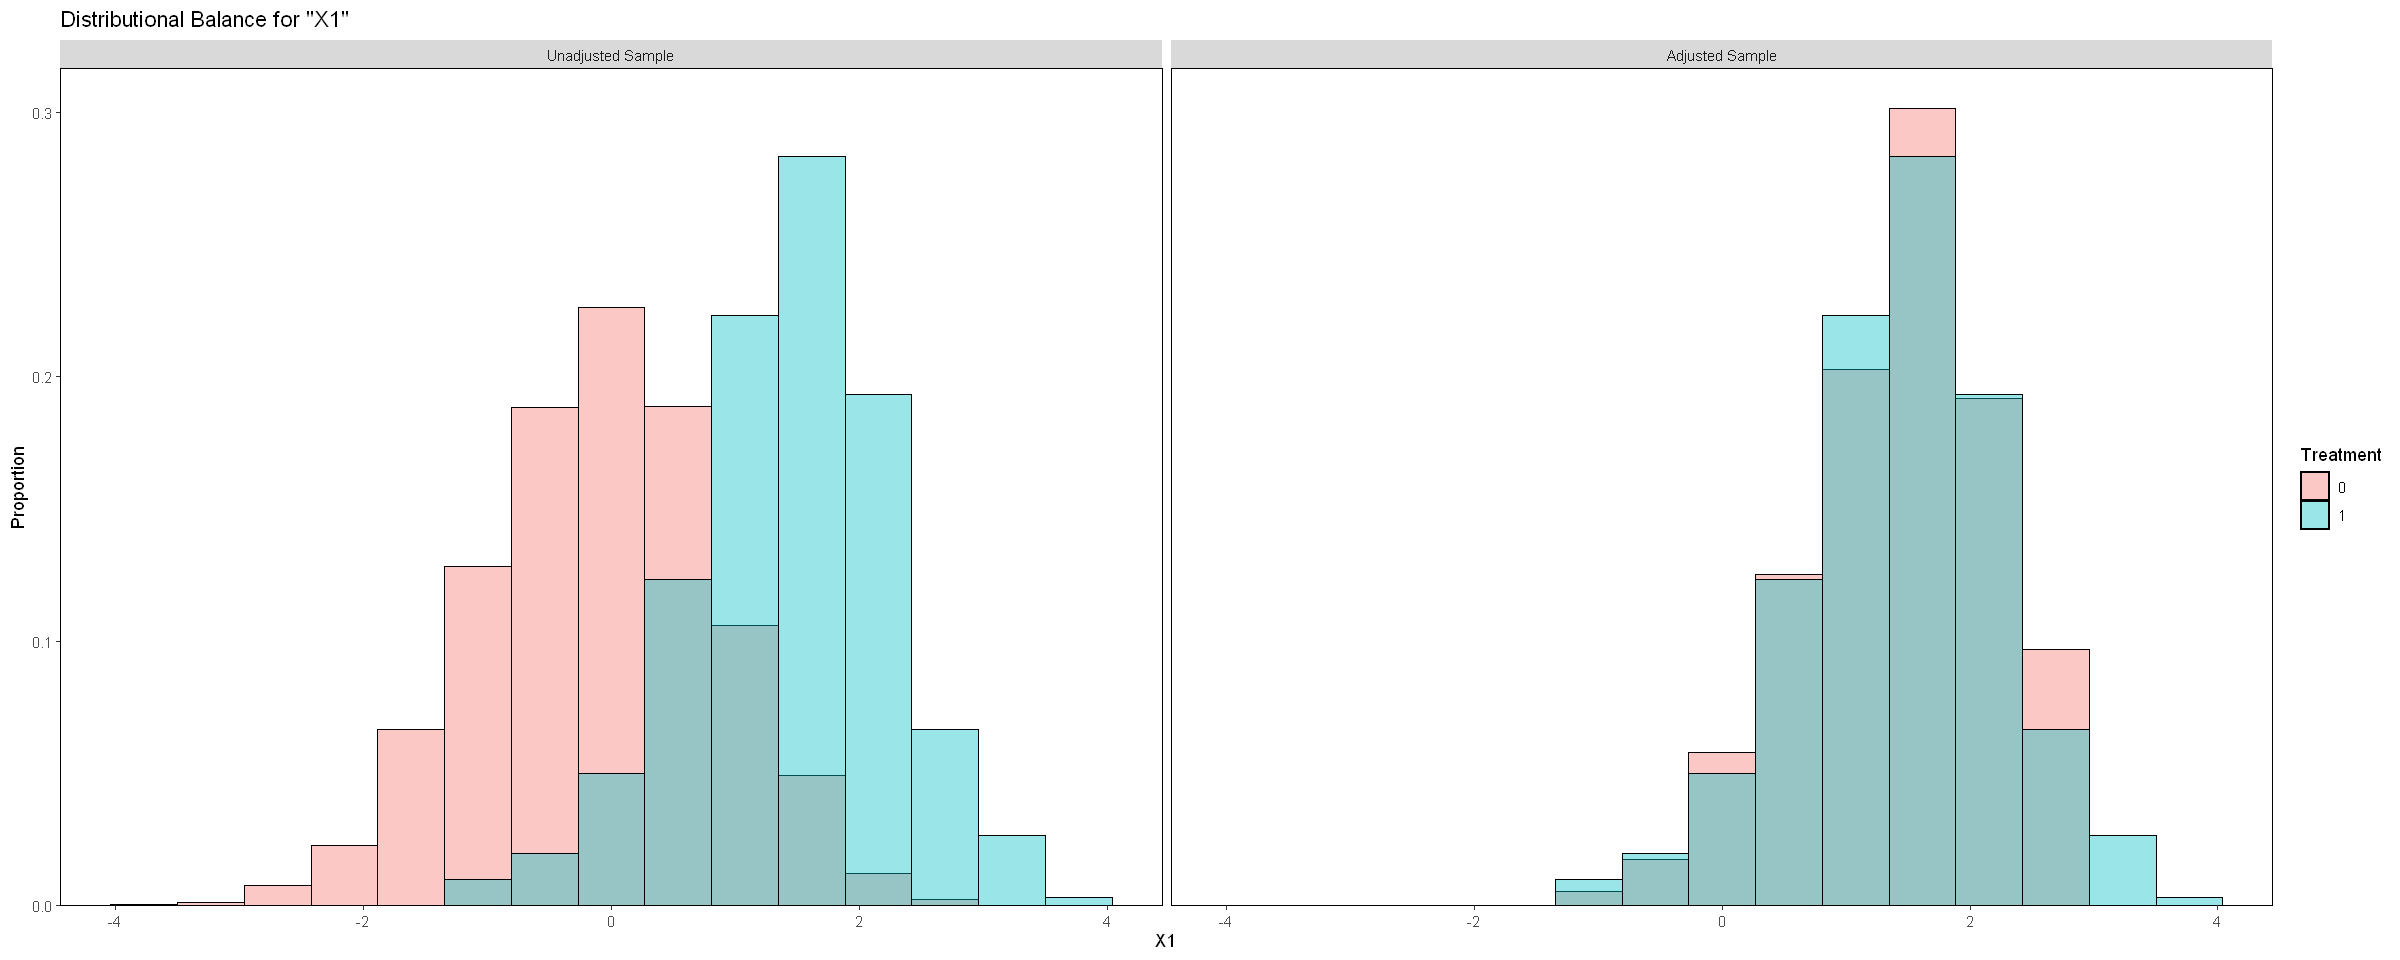

In [12]:
bal.plot(
    x=formula,
    var.name="X1",
    data=df_test,
    weights=weights,
    which="both",
    type = "histogram",
    mirror = FALSE,
    bins = 15)

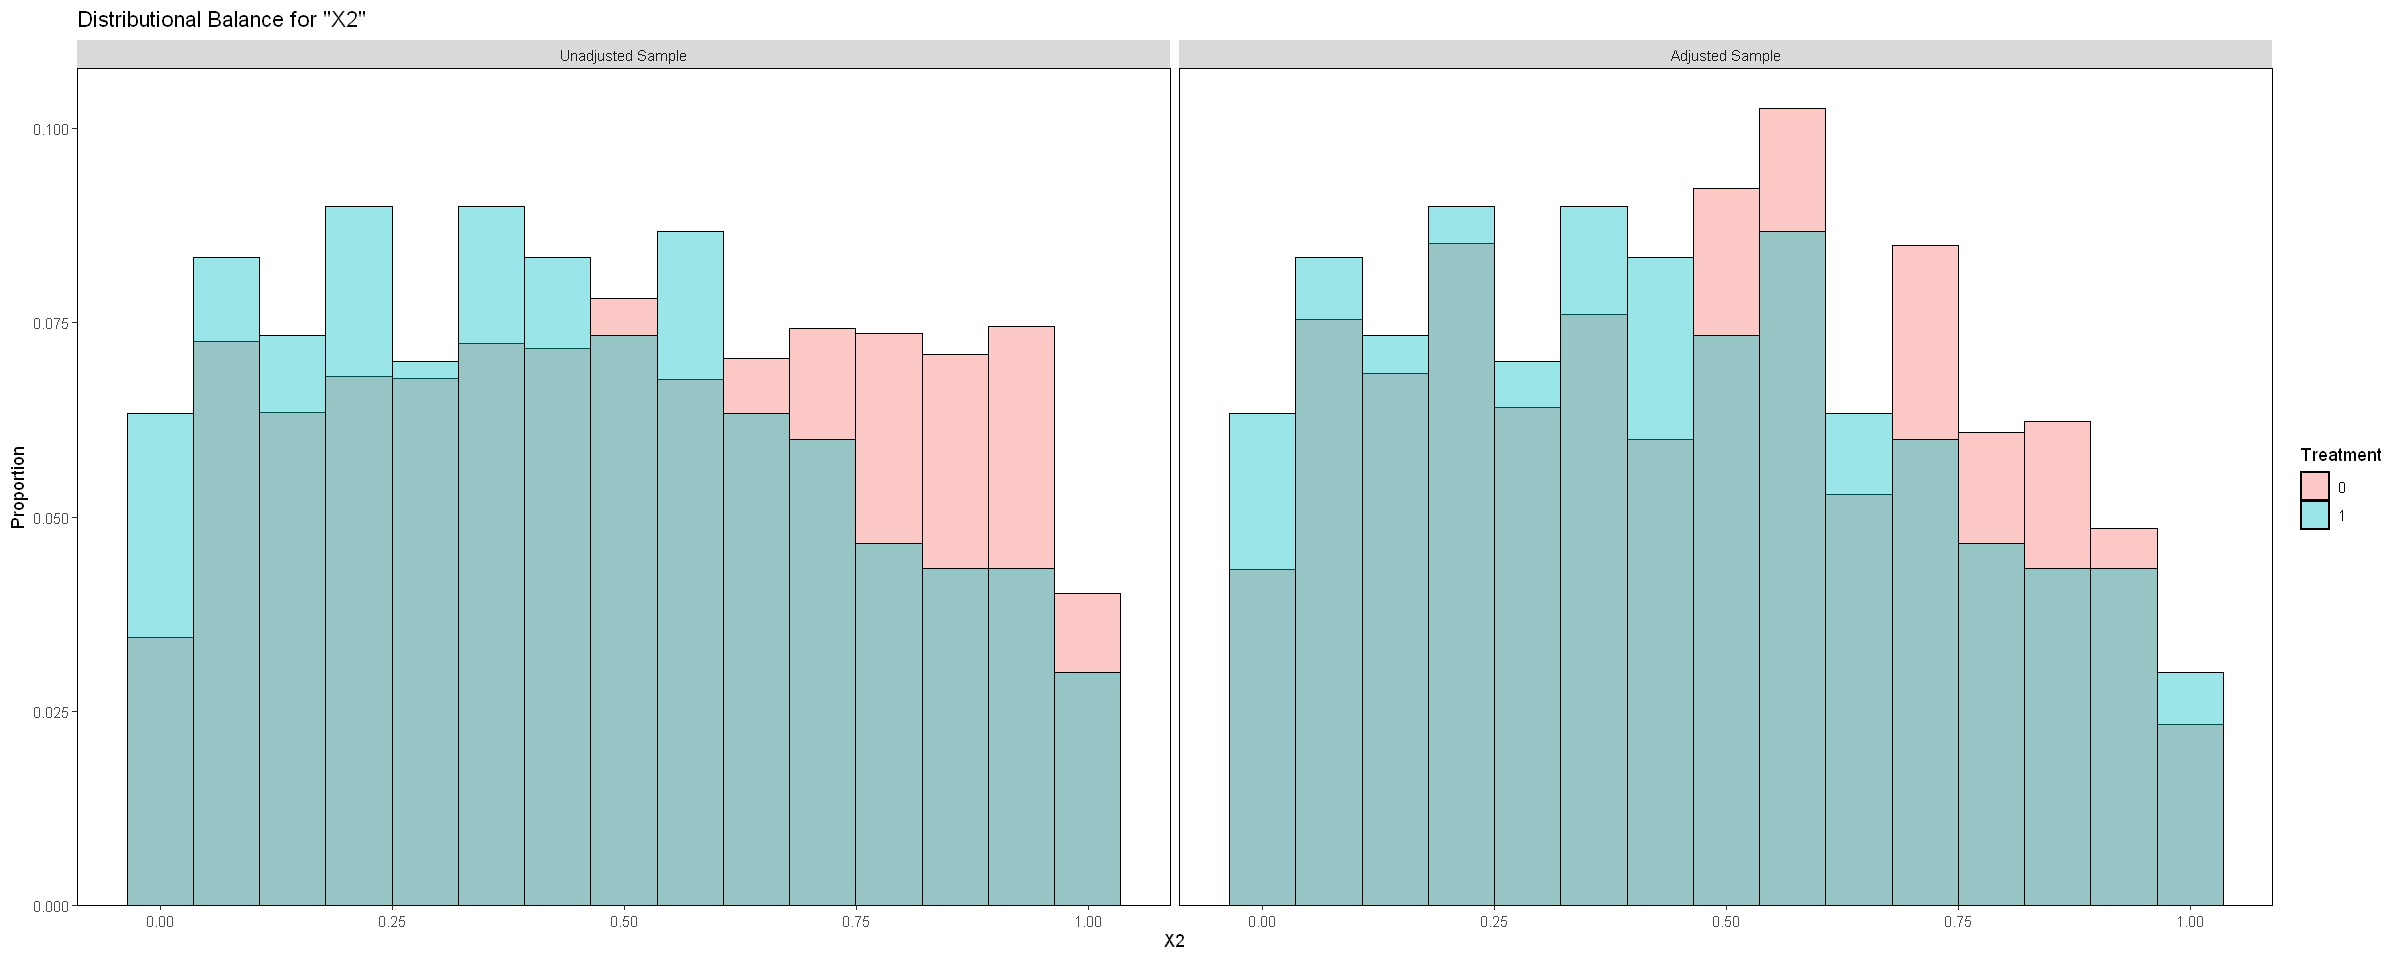

In [13]:
bal.plot(
    x=formula,
    var.name="X2",
    data=df_test,
    weights=weights,
    which="both",
    type = "histogram",
    mirror = FALSE,
    bins = 15)

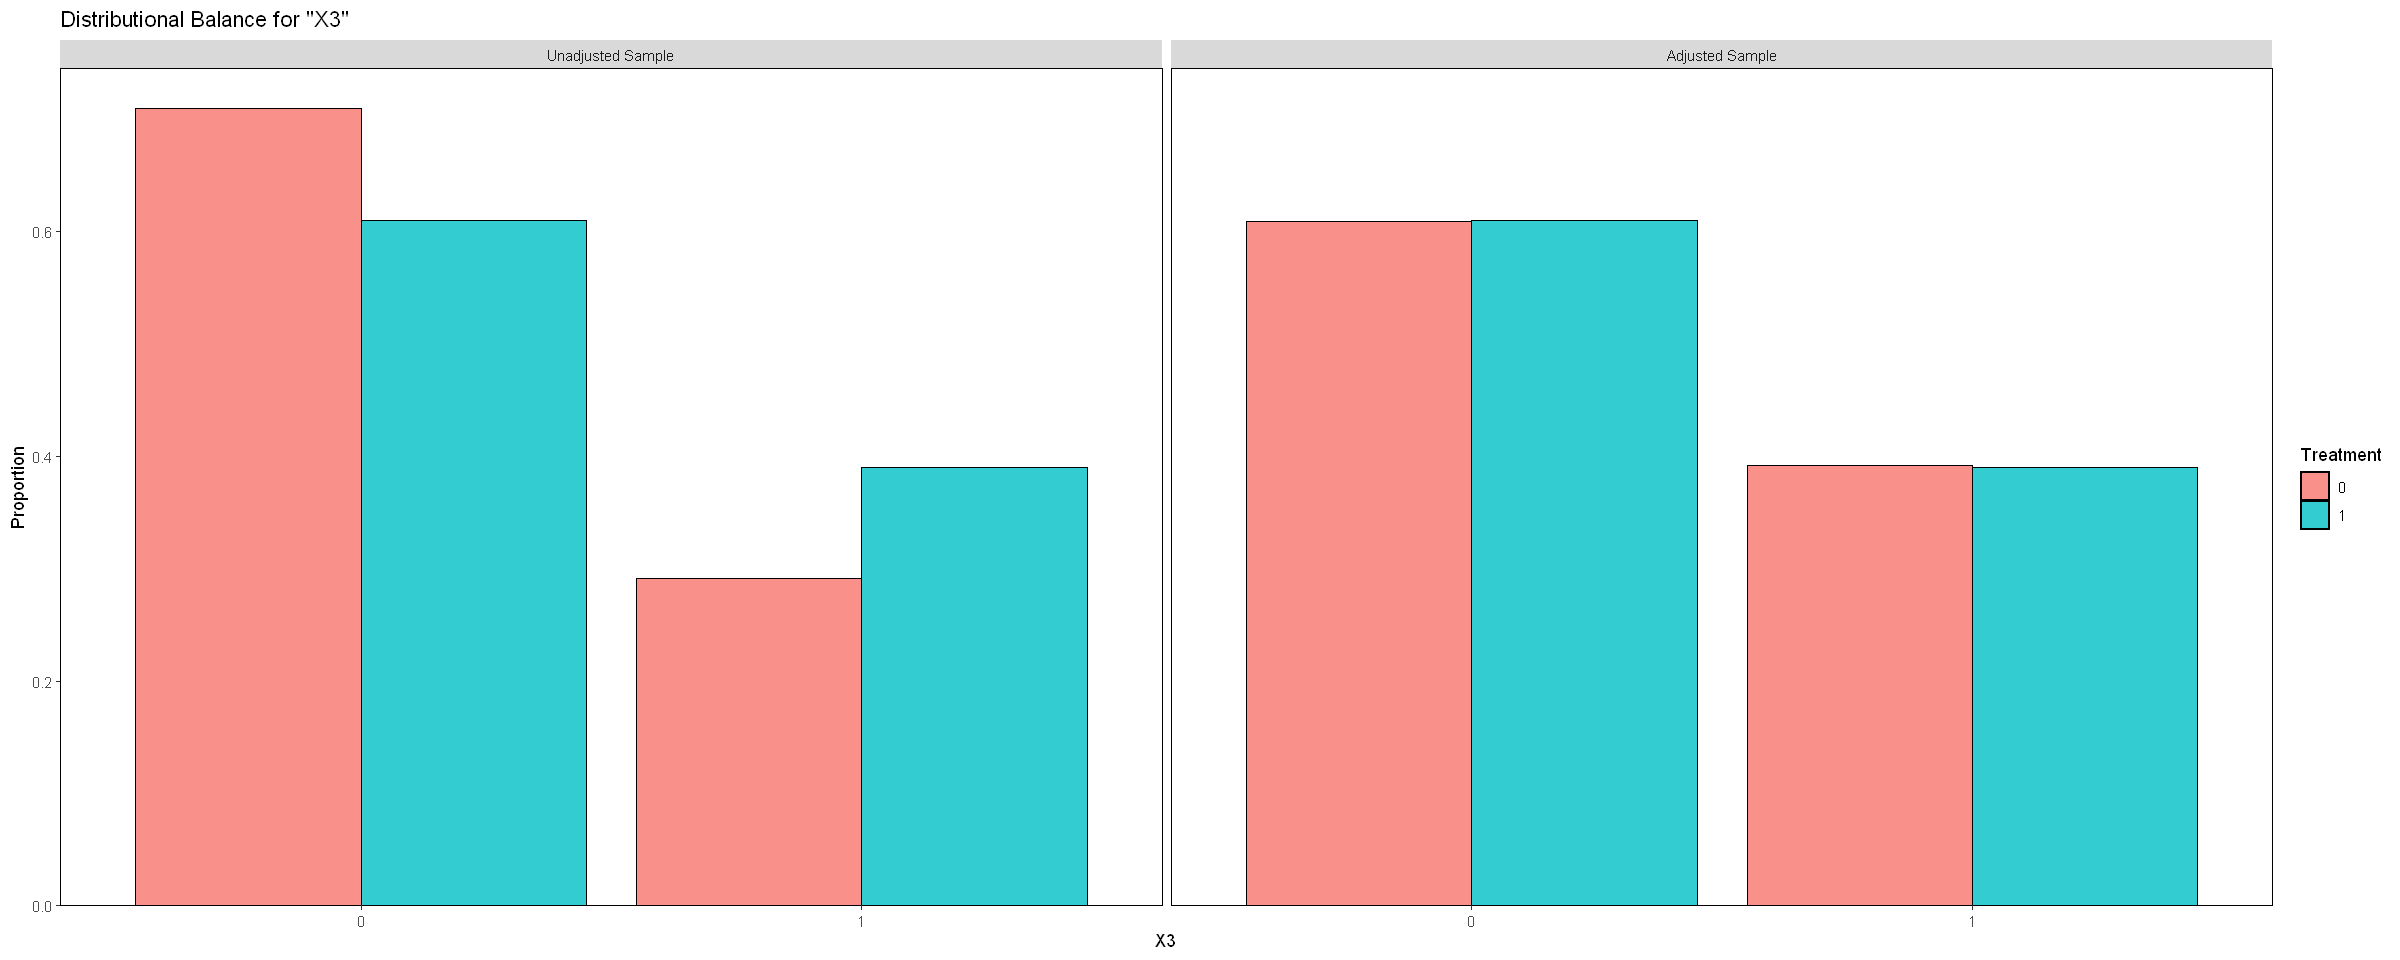

In [14]:
bal.plot(
    x=formula,
    var.name="X3",
    data=df_test,
    weights=weights,
    which="both",
    type = "histogram")